# САС
________________________________________________________________________________________________________________________________
Подготовили:

*Чирин Сергей*

*Андреева Мария*

*Колесников Павел*

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from PIL import Image 

In [2]:
data = pd.read_csv('!03&04_17_VSE.csv', sep=';', encoding='cp1251') 
data.head(10) 

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
5,01.03.2017 12:19,07.03.2017 0:00,3999682_TR,К отгрузке,2 962,2 962,Курьерская,Наличная,Москва,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574851-53495753545674,97117_au30@yandex.ru,Мария,IDL00026934452,0,NaN
6,01.03.2017 12:19,07.03.2017 0:00,3999682_TR,К отгрузке,2 962,2 962,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,1,01.03.2017 0:00,55574851-53495753545674,97117_au30@yandex.ru,Мария,IDL00031393654,0,NaN
7,01.03.2017 11:57,09.03.2017 0:00,3999687_TR,Частичный возврат,19 991,19 991,Курьерская,Наличная,Москва,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",...,300,10,1,01.03.2017 0:00,55574853-53565050515377,111117_ou23@workmail.ru,Николаева,IDL00011556856,0,NaN
8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1 196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,NaN
9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1 196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,NaN


Размеры датафрейма:

In [3]:
data.shape

(691539, 38)

Проверим есть ли в этих данных одинаковые строки. Посмотрим сколько таких.

In [4]:
print('Одинаковых строк:', data.shape[0] - data.drop_duplicates().shape[0], \
      '\nБез дупликатов:', data.drop_duplicates().shape[0])
data.drop_duplicates(inplace=True)

Одинаковых строк: 4658 
Без дупликатов: 686881


In [5]:
data.describe()

,Количество,МесяцДатыЗаказа,НомерСтроки,КоличествоПроданоКлиенту
count,686881.000000,686881.000000,686881.000000,686881.000000
mean,1.436506,3.511353,5.061099,1.197651
std,1.988494,0.499871,6.845193,1.901399
min,0.000000,3.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000
50%,1.000000,4.000000,2.000000,1.000000
75%,1.000000,4.000000,6.000000,1.000000
max,180.000000,4.000000,147.000000,180.000000


Только у 4 признаков есть описание - говорит о том, что остальные не числовые. Смотрим типы категорий. 

In [6]:
data.dtypes

Дата                        object
ДатаДоставки                object
НомерЗаказаНаСайте          object
НовыйСтатус                 object
СуммаЗаказаНаСайте          object
СуммаДокумента              object
МетодДоставки               object
ФормаОплаты                 object
Регион                      object
Группа2                     object
Группа3                     object
Группа4                     object
Тип                         object
Номенклатура                object
ТипТовара                   object
Отменено                    object
ПричинаОтмены               object
Количество                   int64
Цена                        object
СуммаСтроки                 object
ЦенаЗакупки                 object
МесяцДатыЗаказа              int64
ГодДатыЗаказа               object
ПВЗ_код                     object
Статус                      object
Гео                         object
Маржа                       object
СуммаУслуг                  object
СуммаДоставки       

Как мы выдим, у явно числовых категорий тип данных object, заменяем его на числовой. Посмотрим на значения числовых категорий.

In [7]:
array = ['СуммаЗаказаНаСайте', 'СуммаДокумента','Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'ГодДатыЗаказа',
      'Маржа', 'СуммаУслуг', 'СуммаДоставки']

for _ in array:
    print(_, '\n', data[_].unique(), '\n')

СуммаЗаказаНаСайте 
 ['12 098' '4 819' '3 325' ... '17 760' '25 130' '14 735'] 

СуммаДокумента 
 ['12 247' '3 759' '3 325' ... '25 130' '19 200' '14 735'] 

Цена 
 ['680' '379' '3 325' ... '498,86' '5 710' '1 561,70'] 

СуммаСтроки 
 ['680' '379' '3 325' ... '498,86' '5 710' '1 561,70'] 

ЦенаЗакупки 
 ['172' '209,8' '1 149' ... '5 063,45' '2 492,16' '165,12'] 

ГодДатыЗаказа 
 ['2 017'] 

Маржа 
 ['508' '169,2' '2 176' ... '387,23' '900,7' '580,5'] 

СуммаУслуг 
 ['0' '300' '49' '350' '99' '290' '440' '340' '180' '600' '510' '2 200'
 '265' '230' '150' '220' '550' '390' '1 200' '1 000' '420' '260' '500'
 '345' '870' '1 300' '330' '280' '680' '750' '700' '2 000' '250' '450'
 '515' '315' '430' '380' '410' '490' '485' '310' '270' '590' '1 230'
 '2 800' '2 300' '3 600' '1 870' '1 100' '800' '770' '900' '690' '1 090'
 '1 070' '670' '400' '2 340' '610' '1' '360' '275' '4 775' '1 600' '98'
 '760' '660' '240' '279' '850' '470' '1 800' '460' '1 360' '1 700' '255'
 '650' '1 400' '1 545' '1 105'

Как мы видим, категории числовые, но записать их как числовые кастом к инту не получится, нужно:
убрать 'пробелы' между разрядами 
заменять ',' на '.'

In [8]:
# array = ['СуммаЗаказаНаСайте', 'СуммаДокумента','Цена',
#        'СуммаСтроки', 'ЦенаЗакупки', 'ГодДатыЗаказа',
#       'Маржа', 'СуммаУслуг', 'СуммаДоставки']
for i in range(len(array)):
    data[array[i]] = data[array[i]].fillna(-57)
    data[array[i]] = pd.to_numeric(data[array[i]].astype(str).str.replace(" ", "").str.replace(",", "."))
    data[array[i]] = data[array[i]].replace(-57, np.NaN)

In [9]:
min_marja = 1
for _ in data['Маржа'] :
    if _ < min_marja:
        min_marja = _
print('Минимальная отрицательная маржа:', min_marja)

count = 0
for _ in data['Маржа'] :
    if _ == -57:
        count += 1
print('Строк, в которых маржа == -57:', count) #для того чтобы удостоверится, что то, что мы заменили не испортит данные

Минимальная отрицательная маржа: -11961.73
Строк, в которых маржа == -57: 0


In [10]:
print('Количество признаков:', len(data.columns))
data.columns

Количество признаков: 38


Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

In [11]:
tmp = data.isna().sum()
tmp

Дата                             0
ДатаДоставки                   626
НомерЗаказаНаСайте               4
НовыйСтатус                      0
СуммаЗаказаНаСайте               0
СуммаДокумента                   0
МетодДоставки                    0
ФормаОплаты                      0
Регион                        5140
Группа2                      74684
Группа3                      74684
Группа4                     104975
Тип                              0
Номенклатура                     0
ТипТовара                    74688
Отменено                         0
ПричинаОтмены               620209
Количество                       0
Цена                             0
СуммаСтроки                      0
ЦенаЗакупки                  76911
МесяцДатыЗаказа                  0
ГодДатыЗаказа                    0
ПВЗ_код                     224858
Статус                           0
Гео                              0
Маржа                        76918
СуммаУслуг                       0
СуммаДоставки       

In [12]:
tmp = 100 * tmp / data.shape[0]

df = pd.DataFrame(tmp) 
df.reset_index(level=0, inplace=True)
df.rename(columns={df.columns[0]: "Столбец", df.columns[1]: "%"}, inplace = True)
df = df.sort_values("%", axis=0, ascending=False, inplace=False)
df.reset_index(inplace=True, drop=True)
df 

,Столбец,%
0,МагазинЗаказа,99.274838
1,ПричинаОтмены,90.293515
2,ПВЗ_код,32.736093
3,Группа4,15.282851
4,Маржа,11.198155
5,ЦенаЗакупки,11.197136
6,ТипТовара,10.873499
7,Группа2,10.872917
8,Группа3,10.872917
9,ЭлектроннаяПочта_new,1.900184


In [13]:
inf_ = data.agg([(lambda x: x.nunique()), (lambda x: x.nunique() / len(x) * 100), 
                 (lambda x: x.isin([0]).sum()), (lambda x: x.isin([0]).sum() / len(x) * 100), 
                 (lambda x: x.isna().sum()), (lambda x: x.isna().sum() / len(x) * 100),]).transpose() 
inf_.columns = ["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs"] 
inf_.sort_values(by=["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs"], ascending=False)

,Unique,Percent unique,Zeros,Percent zeros,NaNs,Percent NaNs
НомерЗаказаНаСайте,178418.0,25.975096,0.0,0.000000,4.0,0.000582
Телефон_new,114448.0,16.661984,0.0,0.000000,0.0,0.000000
ID_SKU,85380.0,12.430101,0.0,0.000000,0.0,0.000000
Номенклатура,73256.0,10.665021,0.0,0.000000,0.0,0.000000
Маржа,43916.0,6.393538,19465.0,2.833824,76918.0,11.198155
Дата,28887.0,4.205532,0.0,0.000000,0.0,0.000000
ЦенаЗакупки,24782.0,3.607903,0.0,0.000000,76911.0,11.197136
СуммаСтроки,17527.0,2.551679,20325.0,2.959028,0.0,0.000000
Цена,16856.0,2.453991,38.0,0.005532,0.0,0.000000
СуммаДокумента,14747.0,2.146951,25772.0,3.752033,0.0,0.000000


Выкидываем признак "ГодДатыЗаказа" - т.к. он всегда равен 2017, здесь будет помарка небольшая чуть дальше

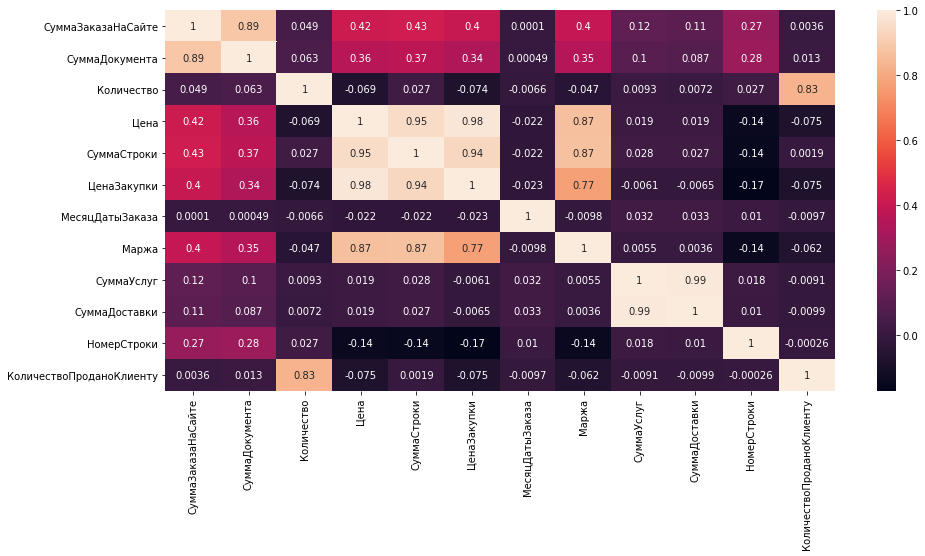

In [14]:
fig = plt.figure(figsize = (15, 7)) 
sns.heatmap(data.drop(columns=['ГодДатыЗаказа']).corr(), annot=True) 

In [15]:
data["ДатаЗаказаНаСайте"].unique()

array(['28.02.2017 0:00', '01.03.2017 0:00', '02.03.2017 0:00',
       '03.03.2017 0:00', '06.03.2017 0:00', '07.03.2017 0:00',
       '05.03.2017 0:00', '08.03.2017 0:00', '09.03.2017 0:00',
       '10.03.2017 0:00', '11.03.2017 0:00', '12.03.2017 0:00',
       '13.03.2017 0:00', '14.03.2017 0:00', '15.03.2017 0:00',
       '16.03.2017 0:00', '17.03.2017 0:00', '18.03.2017 0:00',
       '19.03.2017 0:00', '20.03.2017 0:00', '21.03.2017 0:00',
       '22.03.2017 0:00', '23.03.2017 0:00', '24.03.2017 0:00',
       '25.03.2017 0:00', '26.03.2017 0:00', '27.03.2017 0:00',
       '28.03.2017 0:00', '29.03.2017 0:00', '30.03.2017 0:00',
       '31.03.2017 0:00', '04.03.2017 0:00', '10.01.2009 0:00',
       '24.02.2017 0:00', '11.01.2009 0:00', '12.01.2009 0:00',
       '22.02.2017 0:00', '13.01.2009 0:00', '27.02.2017 0:00',
       '14.01.2009 0:00', '17.02.2017 0:00', '14.02.2017 0:00',
       '25.02.2017 0:00', '17.04.2017 0:00', '07.04.2017 0:00',
       '16.04.2017 0:00', '13.04.2017 0:

Как мы видим есть дата заказа на сайте от 2009 года, а дата доставки в 2017 году, кажется заказ не мог столько жить.

In [16]:
import datetime
# def convert_date_to_datetime(date_time_str):
#     if pd.isna(date_time_str):
#         return date_time_str
#     if type(date_time_str) != str:
#         return date_time_str
#     return datetime.strptime(date_time_str, '%d.%m.%Y %H:%M')
data['ДатаЗаказаНаСайте'] = pd.to_datetime(data['ДатаЗаказаНаСайте'])

In [17]:
data['ДатаЗаказаНаСайте']

0        2017-02-28
1        2017-01-03
2        2017-01-03
3        2017-01-03
4        2017-01-03
            ...    
691534   2017-04-17
691535   2017-04-17
691536   2017-04-17
691537   2017-04-17
691538   2017-04-17
Name: ДатаЗаказаНаСайте, Length: 686881, dtype: datetime64[ns]

In [18]:
# date_obj = datetime.datetime(2017, 1, 1)
# print(date_obj)

In [19]:
data["ДатаЗаказаНаСайте"].unique()

array(['2017-02-28T00:00:00.000000000', '2017-01-03T00:00:00.000000000',
       '2017-02-03T00:00:00.000000000', '2017-03-03T00:00:00.000000000',
       '2017-06-03T00:00:00.000000000', '2017-07-03T00:00:00.000000000',
       '2017-05-03T00:00:00.000000000', '2017-08-03T00:00:00.000000000',
       '2017-09-03T00:00:00.000000000', '2017-10-03T00:00:00.000000000',
       '2017-11-03T00:00:00.000000000', '2017-12-03T00:00:00.000000000',
       '2017-03-13T00:00:00.000000000', '2017-03-14T00:00:00.000000000',
       '2017-03-15T00:00:00.000000000', '2017-03-16T00:00:00.000000000',
       '2017-03-17T00:00:00.000000000', '2017-03-18T00:00:00.000000000',
       '2017-03-19T00:00:00.000000000', '2017-03-20T00:00:00.000000000',
       '2017-03-21T00:00:00.000000000', '2017-03-22T00:00:00.000000000',
       '2017-03-23T00:00:00.000000000', '2017-03-24T00:00:00.000000000',
       '2017-03-25T00:00:00.000000000', '2017-03-26T00:00:00.000000000',
       '2017-03-27T00:00:00.000000000', '2017-03-28

In [20]:
# times = []
# for _ in data['ДатаЗаказаНаСайте']:
#     if _ < date_obj:
#         times.append(_)
# times

In [21]:
data_new = data[data['ДатаЗаказаНаСайте'] < '2017-01-01 00:00:00']
data_new

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
31397,01.03.2017 10:39,16.03.2017 0:00,1986000653_TR,Доставлен,7360,7360.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,10,2009-10-01,55575348-55575348545473,NaN,Шпрангель,ID000so-4653856,Омск,STORE_015
31731,01.03.2017 13:49,16.03.2017 0:00,1986000655_TR,Возврат из ПВЗ,22799,22799.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,0,2009-10-01,55574951-54555456525275,NaN,Щербаков,IDL00041127755,Омск,STORE_015
35220,02.03.2017 13:15,16.03.2017 0:00,1986000657_TR,Возврат из ПВЗ,3370,3370.0,Магазины,Безналичная,NaN,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,1,0,2009-11-01,55575651-54505052574876,NaN,Акимова,IDL00030654250,Омск,STORE_015
35317,02.03.2017 13:43,16.03.2017 0:00,1986000658_TR,Возврат из ПВЗ,3150,3150.0,Магазины,Безналичная,NaN,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,1,0,2009-11-01,55575651-54505052574876,NaN,Акимова,IDL00030654149,Омск,STORE_015
36061,02.03.2017 17:39,16.03.2017 0:00,1986000659_TR,Доставлен,1425,1425.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,1,2009-12-01,55574951-57555557564874,NaN,Завгородний,ID60155250,Омск,STORE_015
37689,03.03.2017 15:14,16.03.2017 0:00,1986000660_TR,Доставлен,2897,2897.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,1,2009-12-01,55575453-57565257535476,NaN,Починкина,IDL00000676250,Омск,STORE_015
37690,03.03.2017 15:13,16.03.2017 0:00,1986000661_TR,Возврат из ПВЗ,7404,7404.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,0,2009-12-01,55575453-57555549484870,NaN,Верстюк,IDL00000675452,Омск,STORE_015
37691,03.03.2017 15:13,16.03.2017 0:00,1986000661_TR,Возврат из ПВЗ,7404,7404.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,2,0,2009-12-01,55575453-57555549484870,NaN,Верстюк,IDL00000674149,Омск,STORE_015
40672,04.03.2017 9:35,16.03.2017 0:00,1986000663_TR,Возврат из ПВЗ,19500,19500.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,0,2009-01-13,55574856-56485655505575,NaN,Афонина,ID000sm-9525250,Омск,STORE_015
41238,04.03.2017 14:37,16.03.2017 0:00,1986000664_TR,Возврат из ПВЗ,7219,7219.0,Магазины,Безналичная,NaN,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,0,2009-01-13,55574852-51505550494873,NaN,Давлетова,IDL00003491149,Омск,STORE_015


In [23]:
with pd.ExcelWriter('path_to_file.xlsx') as writer:
    data_new.to_excel(writer)

FileCreateError: [Errno 13] Permission denied: 'path_to_file.xlsx'

In [ ]:
data['СуммаСтроки'] = pd.to_numeric(data['СуммаСтроки'].astype(str).str.replace(" ", "").str.replace(",", "."))
print(len(data['НомерЗаказаНаСайте'].unique()))
data['НомерЗаказаНаСайте'].value_counts() #кол-во товаров в каждом заказе 

In [24]:
array = ['СуммаЗаказаНаСайте', 'СуммаДокумента','Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'ГодДатыЗаказа',
      'Маржа', 'СуммаУслуг', 'СуммаДоставки']

len(array)
for i in range(len(array)):
    data[array[i]] = data[array[i]].fillna(-57)
    data[array[i]] = pd.to_numeric(data[array[i]].astype(str).str.replace(" ", "").str.replace(",", "."))
    data[array[i]] = data[array[i]].replace(-57, np.NaN)

In [25]:
data

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12098,12247.0,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,2017-02-28,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4998,4998.0,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,2017-01-03,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3240,3240.0,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,1,2017-04-17,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686881 entries, 0 to 691538
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Дата                      686881 non-null  object        
 1   ДатаДоставки              686255 non-null  object        
 2   НомерЗаказаНаСайте        686877 non-null  object        
 3   НовыйСтатус               686881 non-null  object        
 4   СуммаЗаказаНаСайте        686881 non-null  int64         
 5   СуммаДокумента            686881 non-null  float64       
 6   МетодДоставки             686881 non-null  object        
 7   ФормаОплаты               686881 non-null  object        
 8   Регион                    681741 non-null  object        
 9   Группа2                   612197 non-null  object        
 10  Группа3                   612197 non-null  object        
 11  Группа4                   581906 non-null  object        
 12  Ти

Теперь надо удостоверится, что сумма заказа на сайте была ненулевой

In [27]:
data['СуммаЗаказаНаСайте'].unique()

array([12098,  4819,  3325, ..., 17760, 25130, 14735], dtype=int64)

In [28]:
data_new = data[data['СуммаЗаказаНаСайте'] == 0]
data_new

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
430417,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,3,1,NaT,0,NaN,0,IDL00043798553,0,NaN
458479,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,NaT,0,NaN,0,IDL00042245957,0,NaN
458480,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,NaT,0,NaN,0,IDL00039538351,0,NaN
519586,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,4,4,NaT,0,NaN,0,IDL00005969048,0,NaN
582130,26.04.2017 20:30,10.05.2017 0:00,4489341_TR,Доставлен,0,48.0,Магазины,Безналичная,Нижний Новгород,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,...,0,1,1,2017-04-26,55575048-48515155484970,110117_nu26@yandex.ru,Светлана,IDL00040181654,0,NaN
582131,26.04.2017 20:30,10.05.2017 0:00,4489341_TR,Доставлен,0,48.0,Магазины,Безналичная,Нижний Новгород,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,...,0,2,1,2017-04-26,55575048-48515155484970,110117_nu26@yandex.ru,Светлана,IDL00040181452,0,NaN


In [30]:
with pd.ExcelWriter('path_to_file1.xlsx') as writer:
    data_new.to_excel(writer)

Видим очередную аномалию в двух последних строках, то есть заказ доставлен, но сумма его ноль, то есть такие строки некорректны, их можем удалить

In [28]:
data_new = data_new[data['НовыйСтатус'] == 'Доставлен']
data_new

C:\Users\Maria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
582130,26.04.2017 20:30,10.05.2017 0:00,4489341_TR,Доставлен,0,48.0,Магазины,Безналичная,Нижний Новгород,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,...,0,1,1,2017-04-26,55575048-48515155484970,110117_nu26@yandex.ru,Светлана,IDL00040181654,0,NaN
582131,26.04.2017 20:30,10.05.2017 0:00,4489341_TR,Доставлен,0,48.0,Магазины,Безналичная,Нижний Новгород,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,...,0,2,1,2017-04-26,55575048-48515155484970,110117_nu26@yandex.ru,Светлана,IDL00040181452,0,NaN


Таким образом, итоговая таблица будет следующей:

In [29]:
# df_new = data.copy()
data = data.drop(labels = [582130, 582131],axis = 0)
# data

In [30]:
data[data['СуммаЗаказаНаСайте'] == 0]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
430417,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,3,1,NaT,0,NaN,0,IDL00043798553,0,NaN
458479,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,NaT,0,NaN,0,IDL00042245957,0,NaN
458480,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,NaT,0,NaN,0,IDL00039538351,0,NaN
519586,10.04.2017 13:33,NaN,NaN,Отменен,0,0.0,Самовывоз,Наличная,NaN,КОСМЕТИКА/ГИГИЕНА,...,0,4,4,NaT,0,NaN,0,IDL00005969048,0,NaN


Славно, плюс одна аномалия в карму

In [31]:
data.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

Посмотри, где ничего не продали клиенту

In [32]:
data[data['КоличествоПроданоКлиенту'] == 0]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4998,4998.00,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,2017-01-03,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
20,01.03.2017 12:06,02.03.2017 0:00,4000222_TR,К отгрузке,848,848.00,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,2,0,2017-01-03,55574853-55515149555779,115117_su26@yandex.ru,Гость,IDL00035797553,0,NaN
26,01.03.2017 13:27,02.03.2017 0:00,4001211_TR,К отгрузке,3726,3726.00,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,300,10,0,2017-01-03,55574953-50535456505474,110109_nm23@gmail.com,Наталья,ID9010011813149,0,NaN
28,01.03.2017 13:32,03.03.2017 0:00,4001307_TR,К отгрузке,2970,2713.94,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,8,0,2017-01-03,55575053-55535250495072,115117_su15@bk.ru,Светлана,IDL00001194856,0,NaN
29,01.03.2017 13:32,03.03.2017 0:00,4001307_TR,К отгрузке,2970,2713.94,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,0,2017-01-03,55575053-55535250495072,115117_su15@bk.ru,Светлана,IDL00001163048,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691524,16.04.2017 22:45,18.04.2017 0:00,4409872_TR,К отгрузке,3177,2938.00,Курьерская,Наличная,Москва,ПОДГУЗНИКИ,...,150,6,0,2017-04-16,55575453-50554849524974,98117_bu17@bk.ru,Гость,IDL00040972553,0,NaN
691527,17.04.2017 2:05,29.04.2017 0:00,4410501_TR,Возврат из ПВЗ,2122,2122.00,Магазины,Безналичная,Москва,ОБУВЬ,...,0,2,0,2017-04-17,55575455-48575054505274,109117_mu24@yandex.ru,Светлана,IDL00045433957,0,NaN
691528,17.04.2017 2:05,29.04.2017 0:00,4410501_TR,Возврат из ПВЗ,2122,2122.00,Магазины,Безналичная,Москва,ОБУВЬ,...,0,3,0,2017-04-17,55575455-48575054505274,109117_mu24@yandex.ru,Светлана,IDL00045433957,0,NaN
691529,17.04.2017 2:05,29.04.2017 0:00,4410501_TR,Возврат из ПВЗ,2122,2122.00,Магазины,Безналичная,Москва,ОБУВЬ,...,0,1,0,2017-04-17,55575455-48575054505274,109117_mu24@yandex.ru,Светлана,IDL00043879351,0,NaN


Таким образом, эти товары не выкупили, то есть в таблицу с выкупленными товарами мы их не добавляем

In [33]:
data_buy = data[data['КоличествоПроданоКлиенту'] != 0]
data_buy

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12098,12247.0,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,2017-02-28,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
5,01.03.2017 12:19,07.03.2017 0:00,3999682_TR,К отгрузке,2962,2962.0,Курьерская,Наличная,Москва,ИГРУШКИ,...,0,3,1,2017-01-03,55574851-53495753545674,97117_au30@yandex.ru,Мария,IDL00026934452,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691534,17.04.2017 9:54,24.05.2017 0:00,4411156_TR,Принят в ПВЗ,3240,3240.0,Магазины,Безналичная,Чита,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,1,1,2017-04-17,55574952-51535652495475,guest_103117_gu28@workmail.ru,Гость,IDL00040855553,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


Теперь в этой таблице нам нужны лишь те, которе в статусе доставлены

In [34]:
data_buy = data_buy[data_buy['НовыйСтатус'] == "Доставлен"]
data_buy

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,NaN
9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,2,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691531,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2607.0,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,...,0,1,1,2017-04-17,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


In [35]:
data_buy['Отменено'].unique()

array(['Нет', 'Да'], dtype=object)

Получается, что тут есть и отменные, удалим и их

In [36]:
data_buy = data_buy[data_buy['Отменено'] != "Да"]
data_buy

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,NaN
9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,2,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691531,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2607.0,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,...,0,1,1,2017-04-17,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


In [37]:
data_buy['Отменено'].unique()

array(['Нет'], dtype=object)

Проверим, что суммы ненулевые

In [38]:
data_buy[data_buy['СуммаЗаказаНаСайте'] == 0]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа


In [39]:
data_buy[data_buy['СуммаДокумента'] == 0]

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа


Славно

In [40]:
data_buy

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN
8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,NaN
9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,2,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691531,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2607.0,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,...,0,1,1,2017-04-17,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0,NaN
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,49,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,0,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN


In [41]:
def generate_df(df, column_name): 
    columns_list = [column_name,'Кол-во заказов', 'Кол-во товаров', 'Выручка', 'Средний чек', 'Среднее кол-во товаров в чеке', 'Кол-во уникальных клиентов'] 
    unique_values = df[column_name].unique()
    total_df = pd.DataFrame(columns=columns_list)
    for val in unique_values: 
        list_of_values = [val] 
        fltrd_df = df[df[column_name] == val] 
                
        quantity_orders = fltrd_df['НомерЗаказаНаСайте'].unique().size #кол-во заказов 
        list_of_values.append(quantity_orders) 
        
        quantity_articles = fltrd_df['КоличествоПроданоКлиенту'].sum() #кол-во товаров 
        list_of_values.append(quantity_articles) 
        
        profit = fltrd_df['СуммаСтроки'].sum() #выручка по всем заказам
        list_of_values.append(profit) 

        average_check = fltrd_df.groupby(['НомерЗаказаНаСайте']).mean()['СуммаЗаказаНаСайте'].mean() #средний чек заказа
        list_of_values.append(average_check) 
        
        avarage_quantity = int(round(fltrd_df.groupby(['НомерЗаказаНаСайте']).sum()['КоличествоПроданоКлиенту'].mean())) #среднее кол-во товаров в чеке
        list_of_values.append(avarage_quantity) 
        
        unique_customers = fltrd_df['Телефон_new'].unique().size #кол-во уникальных клиентов
        list_of_values.append(unique_customers)
        
        tmp_df = pd.DataFrame([list_of_values], columns=columns_list) 
#       display(tmp_df)
        total_df = total_df.append(tmp_df, ignore_index=True) 
    return total_df

In [42]:
# mini_df = data_buy.head(400)

In [43]:
# mini_df.dtypes

In [44]:
# array = ['СуммаЗаказаНаСайте', 'СуммаДокумента','Цена',
#        'СуммаСтроки', 'ЦенаЗакупки', 'ГодДатыЗаказа',
#       'Маржа', 'СуммаУслуг', 'СуммаДоставки']

# for i in range(len(array)):
#     mini_df[array[i]] = mini_df[array[i]].replace(np.NaN, 0)
# #     mini_df[array[i]] = mini_df[array[i]].fillna(-57)
# #     mini_df[array[i]] = pd.to_numeric(mini_df[array[i]].astype(str).str.replace(" ", "").str.replace(",", "."))
# #     mini_df[array[i]] = mini_df[array[i]].replace(-57, np.NaN)

In [45]:
# generate_df(mini_df, column_name='МесяцДатыЗаказа')

In [47]:
df_uniques_client_buy = generate_df(data_buy, column_name='Телефон_new')

In [48]:
df_uniques_client_buy

,Телефон_new,Кол-во заказов,Кол-во товаров,Выручка,Средний чек,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов
0,55575453-56535648535679,1,10,3759.0,4819.0,10,1
1,55574950-57515657535772,1,1,3325.0,3325.0,1,1
2,55574854-56495552515179,1,4,528.0,528.0,4,1
3,55574948-52515357485779,2,8,2294.0,1147.0,4,1
4,55574851-55504856515370,1,7,13550.0,13550.0,7,1
...,...,...,...,...,...,...,...
58035,55575148-56485649485370,1,1,849.0,849.0,1,1
58036,55574852-52525056565572,1,1,10390.0,10390.0,1,1
58037,55574856-56565655514875,1,1,650.0,3560.0,1,1
58038,55575056-49565452495078,1,1,10390.0,10390.0,1,1


Посмотрим теперь, как покупают по месяцам и дням неделям, какие есть тенденции

In [49]:
df_mm_buy = generate_df(data_buy, column_name='МесяцДатыЗаказа')

In [50]:
df_mm_buy

,МесяцДатыЗаказа,Кол-во заказов,Кол-во товаров,Выручка,Средний чек,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов
0,3,37151,148320,1.159832e+08,3211.252672,4,31711
1,4,38456,176703,1.187668e+08,3149.631033,5,32436


Максимально не информативно

In [51]:
import datetime

data_buy_new = data_buy.copy()
# data_buy_new['ДатаЗаказаНаСайте'] = data_buy_new['ДатаЗаказаНаСайте'].pd.to_series()
data_buy_new['weekday'] = data_buy_new['ДатаЗаказаНаСайте'].dt.dayofweek
data_buy_new

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,weekday
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,3,1,2017-01-03,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN,1
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,1,1,2017-01-03,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN,1
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,3,1,2017-01-03,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN,1
8,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,3,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0,NaN,1
9,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,2,1,2017-01-03,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691531,17.04.2017 3:18,28.04.2017 0:00,4410609_TR,Доставлен,2607,2607.0,Магазины,Безналичная,Краснодар,ПОДГУЗНИКИ,...,1,1,2017-04-17,55575449-53485056485678,95117__u17@mail.ru,Наталья,IDL00043781351,0,NaN,0
691535,17.04.2017 10:10,19.04.2017 0:00,4411268_TR,Доставлен,1377,1377.0,Магазины,Безналичная,Москва,ИГРУШКИ,...,2,1,2017-04-17,55575054-53545152544971,guest_103117_gu28@workmail.ru,Гость,IDL00013484149,0,NaN,0
691536,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,1,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050250,0,NaN,0
691537,17.04.2017 11:03,27.04.2017 0:00,4411571_TR,Доставлен,1098,2086.0,Магазины,Безналичная,Нижний Новгород,КОСМЕТИКА/ГИГИЕНА,...,2,1,2017-04-17,55575448-49564957485078,97117_au19@mail.ru,Анна,IDL00026050654,0,NaN,0


In [52]:
df_weekday_buy = generate_df(data_buy_new, column_name='weekday')

In [53]:
df_weekday_buy = df_weekday_buy.sort_values(by=['weekday'])
df_weekday_buy

,weekday,Кол-во заказов,Кол-во товаров,Выручка,Средний чек,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов
3,0,12167,51938,37653482.64,3175.970658,4,11252
0,1,11191,46974,34380044.22,3139.836654,4,10422
4,2,11353,50566,33377329.00,3003.616577,4,10530
5,3,11051,49846,32458604.70,3004.436250,5,10270
1,4,10512,43018,33294392.14,3276.543379,4,9790
2,5,11579,52585,36893935.70,3247.559029,5,10667
6,6,7754,30096,26692208.17,3520.108073,4,7351


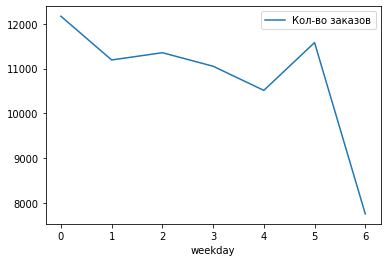

In [54]:
import matplotlib.pyplot as plt

df_weekday_buy.plot(x='weekday', y='Кол-во заказов')
plt.show()

То есть, больше всего закаазывают в понедельник и субботу)


In [ ]:
pip install nbconvert

In [ ]:
data_buy_new

In [55]:
df_uniques_client_buy = pd.to_csv(sep = ',')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [57]:
df_uniques_client_buy.to_csv(sep = ',')


',Телефон_new,Кол-во заказов,Кол-во товаров,Выручка,Средний чек,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов\r\n0,55575453-56535648535679,1,10,3759.0,4819.0,10,1\r\n1,55574950-57515657535772,1,1,3325.0,3325.0,1,1\r\n2,55574854-56495552515179,1,4,528.0,528.0,4,1\r\n3,55574948-52515357485779,2,8,2294.0,1147.0,4,1\r\n4,55574851-55504856515370,1,7,13550.0,13550.0,7,1\r\n5,55574948-52504948534879,2,9,6239.0,3449.0,4,1\r\n6,55574853-53564848495777,3,10,10100.0,3366.6666666666665,3,1\r\n7,55574848-48495057545270,1,3,2870.0,2870.0,3,1\r\n8,55575055-49524856525174,1,1,4070.0,4070.0,1,1\r\n9,55575449-54575049575277,2,3,3478.0,1739.0,2,1\r\n10,55575056-49525149485078,1,2,819.0,819.0,2,1\r\n11,55575349-54575053535674,1,1,1530.0,1530.0,1,1\r\n12,55574950-56564951574972,1,4,1463.0,1463.0,4,1\r\n13,55575349-53495648505476,2,10,6645.0,3322.5,5,1\r\n14,55574954-52494949554977,1,4,3299.0,3299.0,4,1\r\n15,55575054-57504950525175,1,1,5800.0,5800.0,1,1\r\n16,55574851-53505050495670,1,6,3690.0,3